# Sweeping Waveguide Width
MIT 6.S976: Silicon Photonics. Written by Shoumik Chowdhury (@shoumikdc)

In [192]:
# Import Relevant Packages
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Useful Constants
nm = 1e-9
NUM_RESULTS = 4

In [193]:
f = h5py.File('width_sweep.mat','r')
f.keys()

In [360]:
n_list = []
f_list = []
a_list = []

# Get list of waveguide widths in sweep
waveguide_width = np.array(f['res_n1']['width']).flatten()

# For each of the 4 results, get effective index (n), TE fraction (f), and area (a) 
for idx in range(1, 1 + NUM_RESULTS):
    # Effective Index Sweep
    n_data = np.array(f[f'res_n{idx}']['neff'])
    n_list.append([np.real(n_data[j].view(dtype=np.complex128)[0, 0]) for j, _ in enumerate(n_data)])
    
    # TE Polarization Fraction Sweep
    f_list.append(np.array(f[f'res_f{idx}']['TE_polarization_fraction']).flatten())
    
    # Mode Area Sweep
    a_list.append(np.array(f[f'res_a{idx}']['mode_effective_area']).flatten())


"""
Note: These results are stored as (width_idx) * (result_idx)
"""   
n_list = np.array(n_list)   
f_list = np.array(f_list)   
a_list = np.array(a_list)

print("Shape:", n_list.shape)

Shape: (4, 20)


In [349]:
TE0_list = []
TE1_list = []
TM0_list = []
TM1_list = []


for w_idx, w in enumerate(waveguide_width):
    
    # Get effective index, TE fraction, area vs. width
    neff = n_list.T[w_idx]
    frac = f_list.T[w_idx]
    area = a_list.T[w_idx]
            
    # Sort based on mode area from smallest to largest area
    sorted_area_idx = np.argsort(area)    
    neff = neff[sorted_area_idx]
    frac = frac[sorted_area_idx]
    area = area[sorted_area_idx]
        
    # The largest area mode has to be TM1
    TM1 = neff[sorted_area_idx[3]]
    
    # Remove TM1, and store the remaining
    neff = neff[sorted_area_idx[:3]]
    frac = frac[sorted_area_idx[:3]]
    area = area[sorted_area_idx[:3]]
    
    # Sort remaining modes by TE fraction
    sorted_frac_idx = np.argsort(frac)
    TM0, TE1, TE0 = neff[sorted_frac_idx]

    # Results
    TE0_list.append(TE0)
    TE1_list.append(TE1)
    TM0_list.append(TM0)
    TM1_list.append(TM1)

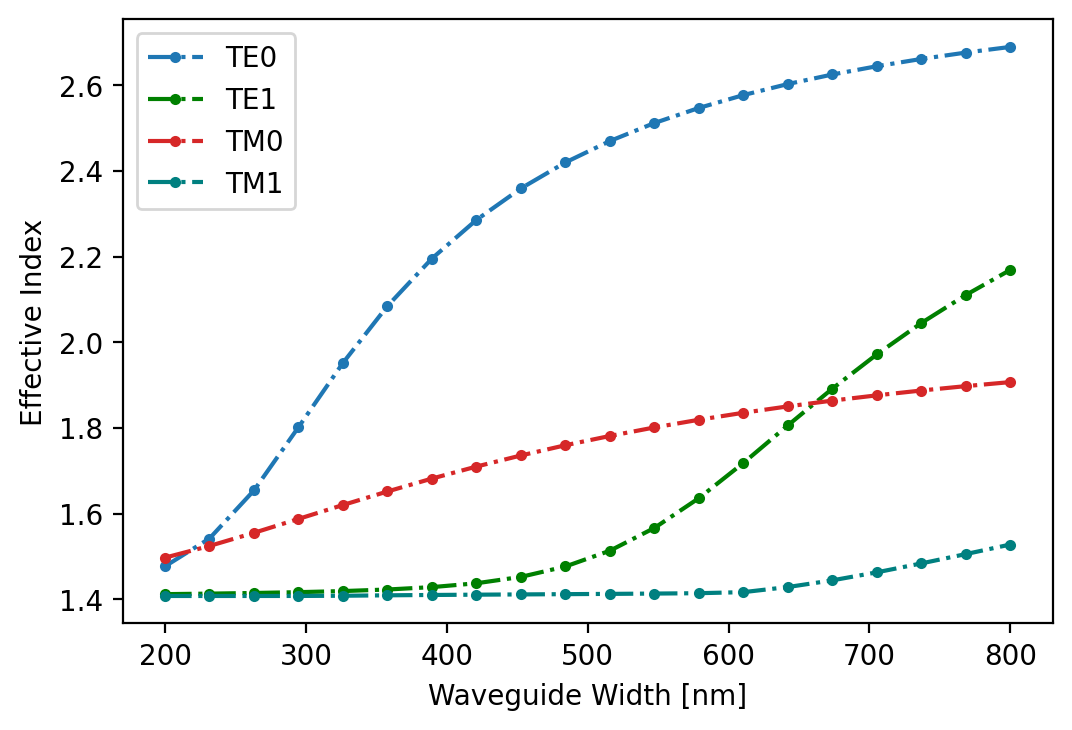

In [362]:
# Sort results, colors, and labels for plotting
results_list = [TE0_list, TE1_list, TM0_list, TM1_list]
colors = ["tab:blue", "green", "tab:red",  "teal"]
labels = ["TE0", "TE1", "TM0", "TM1"]

fig, ax = plt.subplots(dpi=200)

for idx in range(4):
    ax.plot(waveguide_width / nm , results_list[idx], '.-.', c = colors[idx], label = labels[idx])

ax.set_xlabel("Waveguide Width [nm]")
ax.set_ylabel("Effective Index")
plt.legend()
